In [1]:
import numpy as np
import os, sys, time
import matplotlib.pyplot as plt
import numba
import scipy.optimize
import scipy.signal
from scipy.optimize import leastsq, curve_fit
from scipy.stats import pearsonr
from scipy.signal import hilbert
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.signal import find_peaks
from matplotlib.collections import PolyCollection
from PIL import Image
import matplotlib.patches as mpatches
from scipy import integrate
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from matplotlib.patches import Rectangle
import os, subprocess
from operator import itemgetter
import matplotlib
def Sort_by_col1(paras):
    num_paras   = len(paras)
    xtemp       = sorted(enumerate(paras[0]), key=itemgetter(1))
    xindex      = map(itemgetter(0), xtemp)
    multi_piker = itemgetter(*xindex)
    ans         = np.array([multi_piker(paras[i]) for i in range(num_paras)])
    return ans

def thresholdLinearFunction(x, k1, k2):
    y = np.piecewise(x, [x<0, x>=0], [lambda x: k1*x, lambda x: k2*x])
    return y

In [2]:
color_EF = 'k' # '#EA700E'
color_nexus = 'magenta'
color_soma = 'cyan'

# Figure 1

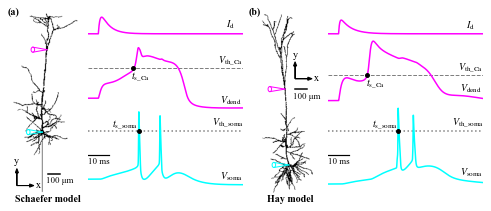

In [3]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth

fig = plt.figure(figsize=(7, 2.8))
shape0, shape1 = 1, 6
ax0 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,0), rowspan=1, colspan=1)
ax1 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,1), rowspan=1, colspan=2)
ax2 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,3), rowspan=1, colspan=1)
ax3 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,4), rowspan=1, colspan=2)
##################################################################################
photo =Image.open('data/schaefer2003Model.png')
ax0.imshow(photo, origin='upper')
ax0.set_xlim(ax0.get_xlim()[0]-0, ax0.get_xlim()[1]+0)
ax0.set_ylim(ax0.get_ylim()[0]+0, ax0.get_ylim()[1]-0)
ax0.axis('off')
##################################################################################
size=15
data = np.load('data/NoEF_tde20ms_Imax1.6nA_SchaeferModel.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
ax1.plot(t, vdend+120, color=color_nexus, lw=1.5, zorder=1)
ax1.plot(t, vsoma*0.95, color=color_soma, lw=1.5, zorder=1)
ax1.plot(t, Iepsp*15+140, color=color_nexus, lw=1.5, zorder=1)
ax1.axhline(-30+120, lw=1, ls='--', color='grey', zorder=0)
ax1.axhline(0, lw=1.5, ls=':', color='grey', zorder=0)
ax1.scatter(547, -30+120, s=size, color='k', zorder=2)
ax1.scatter(549.5, 0, s=size, color='k', zorder=2)
ax1.set_ylim(-90, 170)
ax1.set_xlim(525, 600)
ax1.axis('off')
##################################################################################
photo =Image.open('data/AmirDudai2022Model.png')
ax2.imshow(photo, origin='upper')
ax2.set_xlim(ax0.get_xlim()[0]-10, ax0.get_xlim()[1]-25)
ax2.set_ylim(ax0.get_ylim()[0]+0, ax0.get_ylim()[1]-0)
ax2.axis('off')
##################################################################################
data = np.load('data/NoEF_tde20ms_Imax1.32nA_HayModel.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
ax3.plot(t, vdend+120, color=color_nexus, lw=1.5, zorder=1)
ax3.plot(t, vsoma*0.95, color=color_soma, lw=1.5, zorder=1)
ax3.plot(t, Iepsp*15+140, color=color_nexus, lw=1.5, zorder=1)
ax3.axhline(-40+120, lw=1, ls='--', color='grey', zorder=0)
ax3.axhline(0, lw=1.5, ls=':', color='grey', zorder=0)
ax3.scatter(544, -40+120, s=size, color='k', zorder=2)
ax3.scatter(558.8, 0, s=size, color='k', zorder=2)
ax3.set_ylim(-90, 170)
ax3.set_xlim(525, 600)
ax3.axis('off')
##################################################################################
ax1.text(592, 149, r'$I_{\mathrm{d}}$', fontsize=10)
ax1.text(589, 40, r'$V_{\mathrm{dend}}$', fontsize=10)
ax1.text(589, -70, r'$V_{\mathrm{soma}}$', fontsize=10)
ax1.text(588, 98, r'$V_{\mathrm{th\_Ca}}$', fontsize=10)
ax1.text(546, 75, r'$t_{\mathrm{s\_Ca}}$', fontsize=10)
ax1.text(536.5, 6, r'$t_{\mathrm{s\_soma}}$', fontsize=10)
ax1.text(585, 8, r'$V_{\mathrm{th\_soma}}$', fontsize=10)

ax3.text(592, 148, r'$I_{\mathrm{d}}$', fontsize=10)
ax3.text(589, 57, r'$V_{\mathrm{dend}}$', fontsize=10)
ax3.text(589, -65, r'$V_{\mathrm{soma}}$', fontsize=10)
ax3.text(588, 88, r'$V_{\mathrm{th\_Ca}}$', fontsize=10)
ax3.text(543.3, 65, r'$t_{\mathrm{s\_Ca}}$', fontsize=10)
ax3.text(546, 6, r'$t_{\mathrm{s\_soma}}$', fontsize=10)
ax3.text(585, 8, r'$V_{\mathrm{th\_soma}}$', fontsize=10)


ax1.plot([525, 535], [-35]*2, color='k', lw=1.2)
ax1.text(525, -48, '10 ms', fontsize=9)
ax3.plot([525, 535], [-35]*2, color='k', lw=1.2)
ax3.text(525, -48, '10 ms', fontsize=9)
##################################################################################
ax0.plot([10+60, 10+23.5+60], [302+15]*2, color='k', lw=1.5)
ax0.text(6+60, 320+15, '100 μm', fontsize=9)

centerx, centery = 40, 72
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_nexus, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([40, 68], [72-5, 72], lw=1, color=color_nexus)
ax0.plot([40, 68], [72+5, 72], lw=1, color=color_nexus)
centerx, centery = 31, 235
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_soma, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([31, 59], [235-5, 235], lw=1, color=color_soma)
ax0.plot([31, 59], [235+5, 235], lw=1, color=color_soma)
##################################################################################
centerx, centery = 16, 150
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_nexus, lw=1, fill=False)
ax2.add_artist(circlePatch)
ax2.plot([16, 46], [150-5, 150], lw=1, color=color_nexus)
ax2.plot([16, 46], [150+5, 150], lw=1, color=color_nexus)
centerx, centery = 24, 300
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_soma, lw=1, fill=False)
ax2.add_artist(circlePatch)
ax2.plot([24, 54], [300-5, 300], lw=1, color=color_soma)
ax2.plot([24, 54], [300+5, 300], lw=1, color=color_soma)

ax2.plot([75-10, 100-10], [150]*2, color='k', lw=1.5)
ax2.text(71-10, 170, '100 μm', fontsize=9)
##################################################################################
plt.tight_layout(w_pad=0., h_pad=0)
ax01 = fig.add_axes([0.015, 0.08, 0.08, 0.1])
ax01.arrow(0, 0, 6, 0, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.arrow(0, 0, 0, 6, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.set_xlim(-1, 8.5)
ax01.set_ylim(-1, 8.5)
ax01.set_aspect('equal')
ax01.axis('off')
ax01.text(9, -1, 'x', fontsize=10)
ax01.text(-1.2, 10, 'y', fontsize=10)

ax11 = fig.add_axes([0.567, 0.61, 0.08, 0.1])
ax11.arrow(0, 0, 6, 0, width=0.02, color='k', head_width=1.5, head_length=2)
ax11.arrow(0, 0, 0, 6, width=0.02, color='k', head_width=1.5, head_length=2)
ax11.set_xlim(-1, 8.5)
ax11.set_ylim(-1, 8.5)
ax11.set_aspect('equal')
ax11.axis('off')
ax11.text(9, -1, 'x', fontsize=10)
ax11.text(-1.2, 10, 'y', fontsize=10)


fig.text(0.035, 0.01, 'Schaefer model', fontsize=10, fontweight='bold')
fig.text(0.535, 0.01, 'Hay model', fontsize=10, fontweight='bold')
fig.text(0.02, 0.94, '(a)', fontsize=10, fontweight='bold')
fig.text(0.5, 0.94, '(b)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure1.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure1.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 2

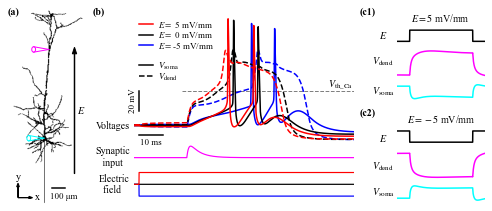

In [4]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth


fig = plt.figure(figsize=(7, 3))
shape0, shape1 = 1, 8
ax0 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,0), rowspan=1, colspan=2)
ax1 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,2), rowspan=1, colspan=4)
ax2 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,6), rowspan=1, colspan=2)

###############################################################################
'''Figure 1(a): Neuron model'''
photo =Image.open('data/schaefer2003Model.png')
ax0.imshow(photo, origin='upper')
ax0.set_xlim(ax0.get_xlim()[0]-0, ax0.get_xlim()[1]+0)
ax0.set_ylim(ax0.get_ylim()[0]+0, ax0.get_ylim()[1]-0)
ax0.axis('off')
###############################################################################
data = np.load('data/Schaefer_vsvd_E5mVmm_tde20ms.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
tvar, Evar = data['tvar'], data['Evar']
idx600 = np.nonzero(t>=600)[0][0]
colors = ['b', 'k', 'r']
for i in range(3):
    ax1.plot(t[:idx600], vsoma[i][:idx600], color=colors[i])
    ax1.plot(t[:idx600], vdend[i][:idx600], color=colors[i], ls='--')
ax1.plot(t[:idx600], Iepsp[:idx600]*7-105, color=color_nexus, lw=1.2)

idx600 = np.nonzero(tvar>=600)[0][0]
for i in range(3):
    ax1.plot(tvar[:idx600], Evar[i][:idx600]*2.3-131, color=colors[i], lw=1.2)

ax1.set_xlim(508, 600)
ax1.set_ylim(-150, )
ax1.axis('off')
###############################################################################
data = np.load('data/NegtiveEF5mV_vs_vd.npz')
tn, vsoman, vdendn, tvarn, Evarn = data['t'], data['vsoma'], data['vdend'], data['tvar'], data['Evar']
data = np.load('data/PositiveEF5mV_vs_vd.npz')
tp, vsomap, vdendp, tvarp, Evarp = data['t'], data['vsoma'], data['vdend'], data['tvar'], data['Evar']
dy = 0.5
ax2.plot(tvarp, Evarp/5 + 1 + dy+7, lw=1.5, color=color_EF)
ax2.plot(tp, vsomap-vsomap[0]+4+dy, lw=1.5, color=color_soma)
ax2.plot(tp, vdendp-vdendp[0]+5+dy, lw=1.5, color=color_nexus)

ax2.plot(tvarn, Evarn/5-6-dy+7, lw=1.5, color=color_EF)
ax2.plot(tn, vsoman-vsoman[0]-5-dy, lw=1.5, color=color_soma)
ax2.plot(tn, vdendn-vdendn[0]-1-dy, lw=1.5, color=color_nexus)

ax2.set_xlim(500, 640)
ax2.set_ylim(-6, 11.3)
ax2.axis('off')
###############################################################################
ax1.plot([510, 515.8], [25]*2, color='r')
ax1.plot([510, 515.8], [25-10]*2, color='k')
ax1.plot([510, 515.8], [25-20]*2, color='b')
ax1.text(518, 25-3, r'$\mathit{E}=$ 5 mV/mm', fontsize=9)
ax1.text(518, 25-3-10, r'$\mathit{E}=$ 0 mV/mm', fontsize=9)
ax1.text(518, 25-3-20, r'$\mathit{E}=$-5 mV/mm', fontsize=9)

ax1.plot([510, 510], [-60, -40], color='k')
ax1.text(506, -59, r'20 mV', fontsize=9, rotation='vertical')
ax1.plot([510, 520], [-83]*2, color='k')
ax1.text(510.5, -92, r'10 ms', fontsize=9, rotation='horizontal')

ax1.plot([510, 515.8], [25-40]*2, color='k')
ax1.plot([510, 516], [25-50]*2, color='k', ls='--')
ax1.text(518, 25-3-40, r'$\mathit{V}_{\mathrm{soma}}$', fontsize=9)
ax1.text(518, 25-3-50, r'$\mathit{V}_{\mathrm{dend}}$', fontsize=9)

ax1.text(500-8, -76, 'Voltages', fontsize=10)
ax1.text(500-8.5, -112, 'Synaptic\n   input', fontsize=10)
ax1.text(500-7, -139, 'Electric\n  field', fontsize=10)

ax2.text(460, 6.5, r'$\mathit{V}_{\mathrm{dend}}$', fontsize=10)
ax2.text(460, 3.8, r'$\mathit{V}_{\mathrm{soma}}$', fontsize=10)
ax2.text(472, 1.8+7, r'$\mathit{E}$', fontsize=10)
ax2.text(460, -2.9, r'$\mathit{V}_{\mathrm{dend}}$', fontsize=10)
ax2.text(460, -5.2, r'$\mathit{V}_{\mathrm{soma}}$', fontsize=10)
ax2.text(472, -7.4+7, r'$\mathit{E}$', fontsize=10)

ax2.text(522, 10.3, r'$\mathit{E}=5$ mV/mm', fontsize=10)
ax2.text(520-4, 1.3, r'$\mathit{E}=-5$ mV/mm', fontsize=10)


ax0.arrow(115, 300, 0, -220, width=0.9, color=color_EF, head_width=8)
ax0.text(120, 190, r'$\mathit{E}$', fontsize=10, color=color_EF, fontweight='bold')
ax0.plot([74, 74+23.5], [302+25]*2, color='k', lw=1.5)
ax0.text(70, 320+25, '100 μm', fontsize=9)
centerx, centery = 40, 72
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_nexus, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([40, 68], [72-5, 72], lw=1, color=color_nexus)
ax0.plot([40, 68], [72+5, 72], lw=1, color=color_nexus)
centerx, centery = 31, 235
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_soma, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([31, 59], [235-5, 235], lw=1, color=color_soma)
ax0.plot([31, 59], [235+5, 235], lw=1, color=color_soma)

ax1.plot([528, 600], [-40]*2, ls='--', lw=1, color='grey', zorder=-1)
ax1.text(589, -35, r'$V_{\mathrm{th\_Ca}}$', fontsize=10)

plt.tight_layout(w_pad=1.5, h_pad=0)
ax01 = fig.add_axes([0.03, 0.07, 0.07, 0.08])
ax01.arrow(0, 0, 6, 0, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.arrow(0, 0, 0, 6, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.set_xlim(-1, 8.5)
ax01.set_ylim(-1, 8.5)
ax01.set_aspect('equal')
ax01.axis('off')
ax01.text(9, -1, 'x', fontsize=10)
ax01.text(-1.2, 10, 'y', fontsize=10)



fig.text(0.03, 0.93, '(a)', fontsize=10, fontweight='bold')
fig.text(0.20, 0.93, '(b)', fontsize=10, fontweight='bold')
fig.text(0.73, 0.93, '(c1)', fontsize=10, fontweight='bold')
fig.text(0.73, 0.46, '(c2)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure2.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure2.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 3

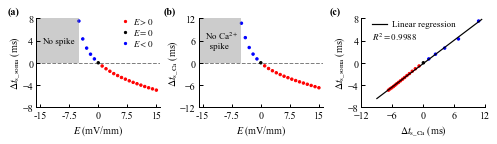

In [5]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth

fig, ax = plt.subplots(1, 3, figsize=(7, 2))
ax0, ax1, ax2 = ax[0], ax[1], ax[2]

data = np.load('data/Imax1.6nA_tde20ms_varyVds-15-15mV.npy')
data = data.transpose()
# '''
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, \ 3, 4, 5, 6
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 7, 8, 9, 10
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude 11, 12, 13, 14
# '''
listVds  = data[1]
dtFirstSpike  = data[8] - data[8][15]
dtSecondSpike = data[9] - data[9][15]
dtSpike       = (dtFirstSpike + dtSecondSpike) / 2
dtFirstSpike[dtFirstSpike < -100]   = None
dtSecondSpike[dtSecondSpike < -100] = None
dtSpike[dtSpike < -100]             = None
CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude     = data[3], data[4], data[5], data[6]
ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude = data[11], data[12], data[13], data[14]
dtCaStartTime = CaStartTime - CaStartTime[15]
dtCaEndTime   = CaEndTime - CaEndTime[15]
dtCaStartTime[dtCaStartTime < -100] = None
dtCaEndTime[dtCaEndTime < -100]     = None
dtICaStartTime = ICaStartTime - ICaStartTime[15]
dtICaEndTime   = ICaEndTime - ICaEndTime[15]
dtICaStartTime[dtICaStartTime < -100] = None
dtICaEndTime[dtICaEndTime < -100]     = None
CaStartTime[CaStartTime == 0]   = None
CaEndTime[CaEndTime == 0]       = None
CaDuration[CaDuration == 0]     = None
CaPeakAmplitude[CaPeakAmplitude < -10]     = None
ICaStartTime[ICaStartTime == 0] = None
ICaEndTime[ICaEndTime == 0]     = None
ICaDuration[ICaDuration == 0]   = None
ICaPeakAmplitude[ICaPeakAmplitude < 0.1]   = None
##############################################################################
colors = ['white']*10 + ['b']*5 + ['k'] + ['r']*15
ax0.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax0.scatter(listVds, dtFirstSpike, s=6, color=colors, zorder=1)
ax0.set_xlabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=3)
ax0.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
##############################################################################
ax1.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax1.scatter(listVds, dtCaStartTime, s=6, color=colors, zorder=1)

ax1.set_xlabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=3)
ax1.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=0)
##############################################################################
x = dtCaStartTime[10:, np.newaxis]
y = dtFirstSpike[10:, np.newaxis]
xfit = np.linspace(-9, 11.3, x.shape[0])[:, np.newaxis]
model = LinearRegression()
model.fit(x, y)
yfit = model.predict(xfit)
r2Score = r2_score(y, model.predict(x))

ax2.scatter(dtCaStartTime, dtFirstSpike, s=6, color=colors)
ax2.plot(xfit, yfit, lw=1.2, color='k')
ax2.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
ax2.set_xlabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=3)
##############################################################################
ax0.set_xlim(-16, 16)
ax0.set_ylim(-8, 8)
ax1.set_xlim(-16, 16)
ax1.set_ylim(-12, 12)
ax2.set_xlim(-12, 12)
ax2.set_ylim(-8, 8)
ax0.set_xticks([-15, -7.5, 0, 7.5, 15], labels=['-15', '-7.5', '0', '7.5', '15'])
ax1.set_xticks([-15, -7.5, 0, 7.5, 15], labels=['-15', '-7.5', '0', '7.5', '15'])
ax0.set_yticks(np.arange(-8, 9, 4))
ax1.set_yticks(np.arange(-12, 13, 6))
ax2.set_yticks(np.arange(-8, 9, 4))
ax2.set_xticks(np.arange(-12, 13, 6))

coordinate = np.array([[-16, 0], [-5, 0], [-5, 8], [-16, 8]])
polycol = PolyCollection([coordinate, ], closed=True, edgecolor=None, facecolor='grey', alpha=0.4)
ax0.add_collection(polycol)
coordinate = np.array([[-16, 0], [-5, 0], [-5, 12], [-16, 12]])
polycol = PolyCollection([coordinate, ], closed=True, edgecolor=None, facecolor='grey', alpha=0.4)
ax1.add_collection(polycol)
ax0.text(-14.5, 3.5, 'No spike', fontsize=9)
ax1.text(-14.5, 4, 'No Ca$^{2+}$\n  spike', fontsize=9)

ax2.plot([-10, -7], [7]*2, lw=1.2, color='k')
ax2.text(-6, 6.5, r'Linear regression', fontsize=9)
ax2.text(-10, 4., r'$R^2=$%.4f' % r2Score, fontsize=9)
for item in ax:
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=3)


ax0.scatter(7, 7+0.5, s=5, color='r')
ax0.scatter(7, 5+0.5, s=5, color='k')
ax0.scatter(7, 3+0.5, s=5, color='b')
ax0.text(9, 7, '$E>0$', fontsize=9)
ax0.text(9, 5, '$E=0$', fontsize=9)
ax0.text(9, 3, '$E<0$', fontsize=9)

plt.tight_layout(w_pad=0.5, h_pad=0)
fig.text(0.02, 0.93, '(a)', fontsize=10, fontweight='bold')
fig.text(0.33, 0.93, '(b)', fontsize=10, fontweight='bold')
fig.text(0.66, 0.93, '(c)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure3.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure3.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 4

(31, 151)


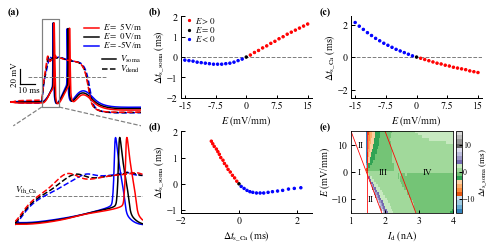

In [6]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
fig = plt.figure(figsize=(7, 3.5))
shape0, shape1 = 2, 3
ax0 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,0), rowspan=2, colspan=1)
ax1 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,1), rowspan=1, colspan=1)
ax2 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,2), rowspan=1, colspan=1)
ax3 = plt.subplot2grid(shape=(shape0, shape1), loc=(1,1), rowspan=1, colspan=1)
ax4 = plt.subplot2grid(shape=(shape0, shape1), loc=(1,2), rowspan=1, colspan=1)
##############################################################################
data = np.load('data/vsvd_E5mVmm_tde20ms_Imax3nA.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
idx600 = np.nonzero(t>=600)[0][0]
colors = ['b', 'k', 'r']
for i in range(3):
    ax0.plot(t[:idx600], vsoma[i][:idx600], color=colors[i], zorder=-1)
    ax0.plot(t[:idx600], vdend[i][:idx600], color=colors[i], ls='--', zorder=-1)
ax0.set_xlim(508, 600)
ax0.set_ylim(-220, 40)
coordinate = np.array([[530, -80], [542, -80], [542, 37], [530, 37]])
polycol = PolyCollection([coordinate, ], closed=True, edgecolor='grey', fc='none', lw=1.2, zorder=1)
ax0.add_collection(polycol)
ax0.plot([530, 510], [-80, -105], color='grey', lw=1.2, ls='--')
ax0.plot([542, 600], [-80, -105], color='grey', lw=1.2, ls='--')
ax0.axis('off')
##############################################################################
data = np.load('data/Imax3nA_tde20ms_varyVds-15-15mV.npy')
data = data.transpose()
# '''
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, \ 3, 4, 5, 6
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 7, 8, 9, 10
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude 11, 12, 13, 14
# '''
listVds  = data[1]
dtFirstSpike  = data[8] - data[8][15]
dtSecondSpike = data[9] - data[9][15]
dtSpike       = (dtFirstSpike + dtSecondSpike) / 2
dtFirstSpike[dtFirstSpike < -100]   = None
dtSecondSpike[dtSecondSpike < -100] = None
dtSpike[dtSpike < -100]             = None
CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude     = data[3], data[4], data[5], data[6]
ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude = data[11], data[12], data[13], data[14]
dtCaStartTime = CaStartTime - CaStartTime[15]
dtCaEndTime   = CaEndTime - CaEndTime[15]
dtCaStartTime[dtCaStartTime < -100] = None
dtCaEndTime[dtCaEndTime < -100]     = None
dtICaStartTime = ICaStartTime - ICaStartTime[15]
dtICaEndTime   = ICaEndTime - ICaEndTime[15]
dtICaStartTime[dtICaStartTime < -100] = None
dtICaEndTime[dtICaEndTime < -100]     = None
CaStartTime[CaStartTime == 0]   = None
CaEndTime[CaEndTime == 0]       = None
CaDuration[CaDuration == 0]     = None
# CaPeakAmplitude[CaPeakAmplitude < -10]     = None
ICaStartTime[ICaStartTime == 0] = None
ICaEndTime[ICaEndTime == 0]     = None
ICaDuration[ICaDuration == 0]   = None
ICaPeakAmplitude[ICaPeakAmplitude < 0.1]   = None
##############################################################################
colors = ['b']*15 + ['k'] + ['r']*15
ax1.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax1.scatter(listVds, dtFirstSpike, s=6, color=colors, zorder=1)
ax1.set_xlabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=3)
ax1.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
##############################################################################
ax2.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax2.scatter(listVds, dtCaStartTime, s=6, color=colors, zorder=1)
ax2.set_xlabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=3)
ax2.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=0)
##############################################################################
ax3.scatter(dtCaStartTime, dtFirstSpike, s=6, color=colors)
ax3.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
ax3.set_xlabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=3)
##############################################################################
data = np.load('data/Imax1-4nA_tde20ms_varyVds-15-15mV.npy')
data = data.squeeze().transpose(2, 0, 1)
# '''
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, \ 3, 4, 5, 6
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 7, 8, 9, 10
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude 11, 12, 13, 14
# '''
listVds = data[1][0]
listImax = data[0].transpose()[0]
spikeNumber = data[7].transpose()
firstSpikeTime, secondSpikeTime, firingRateWithinBurst = data[8].transpose(), data[9].transpose(), data[10].transpose()
print(firstSpikeTime.shape)
dtFirstSpikeTime  = np.zeros_like(firstSpikeTime)
dtSecondSpikeTime = np.zeros_like(firstSpikeTime)
for i in range(31):
    dtFirstSpikeTime[i, :] = firstSpikeTime[i, :] - firstSpikeTime[15, :]
    dtSecondSpikeTime[i, :] = secondSpikeTime[i, :] - secondSpikeTime[15, :]
index = np.logical_or(np.abs(dtFirstSpikeTime) > 100, spikeNumber==0)
dtFirstSpikeTime[index] = None
dtSpike = (dtFirstSpikeTime + dtSecondSpikeTime) / 2
index = np.logical_or(np.abs(dtSpike) > 100, spikeNumber==0)
dtSpike[index] = None
CaStartTime, CaEndTime, CaPeakAmplitude     = data[3].transpose(), data[4].transpose(), data[6].transpose()
ICaStartTime, ICaEndTime, ICaPeakAmplitude = data[11].transpose(), data[12].transpose(), data[14].transpose()
dtCaStartTime = np.zeros_like(CaStartTime)
for i in range(31):
    dtCaStartTime[i, :] = CaStartTime[i, :] - CaStartTime[15, :]
index = np.logical_or(np.abs(dtCaStartTime) > 100, spikeNumber==0)
dtCaStartTime[index] = None
dtICaAmplitude = np.zeros_like(ICaPeakAmplitude)
for i in range(31):
    dtICaAmplitude[i, :] = ICaPeakAmplitude[i, :] - ICaPeakAmplitude[15, :]
index = np.logical_or(np.abs(dtICaAmplitude) > 0.1, spikeNumber==0)
dtICaAmplitude[index] = None

pcm = ax4.pcolormesh(listImax, listVds, dtFirstSpikeTime, cmap='tab20c', vmin=-15, vmax=15)
cbar = plt.colorbar(pcm, ax=ax4, label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', pad=0.02, fraction=0.2, aspect=13)
cbar.set_ticks(np.arange(-10, 11, 10))
cbar.set_label(label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=9, labelpad=1)
cbar.ax.tick_params(labelsize=8, pad=1)
ax4.set_xlim(1, 4)
ax4.set_ylim(-15, 15)
ax4.set_xlabel(r'$\mathit{I}_{\mathrm{d}}$ (nA)', fontsize=10, labelpad=3)
ax4.set_ylabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=0)

lw=0.8
ax4.plot([2.9, 2], [-15, 15], color='r', lw=lw)
ax4.plot([1.9, 1], [-15, 15], color='r', lw=lw)
ax4.plot([1.46, 1.46], [-15, 15], color='r', lw=lw)
ax4.text(1.2, -1, 'I', fontsize=9)
ax4.text(1.2, 9, 'II', fontsize=9)
ax4.text(1.5, -11, 'II', fontsize=9)
ax4.text(1.8, -1, 'III', fontsize=9)
ax4.text(3.1, -1, 'IV', fontsize=9)
##############################################################################
ax0.plot([560, 570], [25]*2, color='r')
ax0.plot([560, 570], [25-12]*2, color='k')
ax0.plot([560, 570], [25-24]*2, color='b')
ax0.text(573, 25-3, r'$\mathit{E}=$ 5V/m', fontsize=9)
ax0.text(573, 25-3-12, r'$\mathit{E}=$ 0V/m', fontsize=9)
ax0.text(573, 25-3-24, r'$\mathit{E}=$-5V/m', fontsize=9)
x = 12
ax0.plot([560+x, 570+x], [25-42]*2, color='k')
ax0.plot([560+x, 570+x], [25-55]*2, color='k', ls='--')
ax0.text(573+x, 25-3-42, r'$\mathit{V}_{\mathrm{soma}}$', fontsize=9)
ax0.text(573+x, 25-3-55, r'$\mathit{V}_{\mathrm{dend}}$', fontsize=9)

ax0.plot([515]*2, [-50, -30], color='k', lw=1.2)
ax0.text(508.5, -50, '20 mV', fontsize=9, rotation='vertical')
ax0.plot([515, 525], [-50]*2, color='k', lw=1.2)
ax0.text(513.5, -61, '10 ms', fontsize=9, rotation='horizontal')

ax1.set_xlim(-16, 16)
ax1.set_xticks([-15, -7.5, 0, 7.5, 15], labels=['-15', '-7.5', '0', '7.5', '15'])
ax1.set_ylim(-2, 2)
ax2.set_xlim(-16, 16)
ax2.set_xticks([-15, -7.5, 0, 7.5, 15], labels=['-15', '-7.5', '0', '7.5', '15'])
ax2.set_ylim(-2.5, 2.5)
ax3.set_ylim(-1.1, 2)
ax3.set_xlim(-2, 2.5)


ax1.scatter(-14, 1.8, s=5, color='r')
ax1.scatter(-14, 1.35, s=5, color='k')
ax1.scatter(-14, 0.9, s=5, color='b')
ax1.text(-12.5, 1.65, '$E>0$', fontsize=9)
ax1.text(-12.5, 1.2, '$E=0$', fontsize=9)
ax1.text(-12.5, 0.75, '$E<0$', fontsize=9)


ax4.set_xticks([1, 2, 3, 4])
for item in [ax1, ax2, ax3]:
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=3)


ax0.plot([520, 575], [-40]*2, ls='--', lw=1, color='grey', zorder=-1)


plt.tight_layout(w_pad=0.5, h_pad=0)
ax51 = fig.add_axes([0.03, 0.099, 0.254, 0.39])
data = np.load('data/vsvd_E5mVmm_tde20ms_Imax3nA.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
idx530 = np.nonzero(t>=530)[0][0]
idx540 = np.nonzero(t>=540)[0][0]
colors = ['b', 'k', 'r']
for i in range(3):
    ax51.plot(t[idx530:idx540], vsoma[i][idx530:idx540], color=colors[i])
    ax51.plot(t[idx530:idx540], vdend[i][idx530:idx540], color=colors[i], ls='--')
ax51.set_xlim(530, 540)
ax51.set_ylim(-80, 40)
ax51.axis('off')
ax51.plot([530, 540], [-40]*2, ls='--', lw=1, color='grey', zorder=-1)
ax51.text(530, -35, r'$V_{\mathrm{th\_Ca}}$', fontsize=9)


fig.text(0.015, 0.95, '(a)', fontsize=10, fontweight='bold')
fig.text(0.295, 0.95, '(b)', fontsize=10, fontweight='bold')
fig.text(0.635, 0.95, '(c)', fontsize=10, fontweight='bold')
fig.text(0.295, 0.49, '(d)', fontsize=10, fontweight='bold')
fig.text(0.635, 0.49, '(e)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure4.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure4.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 5

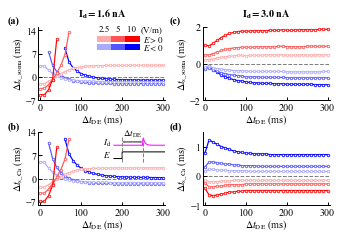

In [7]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
fig, ax = plt.subplots(2, 2, figsize=(4.8, 3.2))
ax0, ax1, ax2, ax3 = ax[0,0], ax[0,1], ax[1,0], ax[1,1]
##############################################################################
list_tde = np.arange(0, 300+1, 10)
data = np.load('data/Imax1.6-3nA_tde0-300ms_Vds-15-15mV_EFDirection90degree.npy')
data = data.squeeze().transpose(0, 1, 3, 2) # (Imax, Vds, results, tDE)
data16, data30 = data[0], data[1]
for i in [0, 1, 2, 3, 5, 6, 7, 8]:
    data16[i] = data16[i] - data16[4]
    data30[i] = data30[i] - data30[4]

colorLength = 7
list_color0 = plt.get_cmap('bwr', lut=colorLength)  # bwr, seismic, cool
colors = [list_color0(i) for i in range(colorLength)]
list_strE = ['-10', '-5', '-2.5', 'snowp', '2.5', '5', '10']
for i in [1, 2, 3, 5, 6, 7]:
    tempindex = data16[i][8] > -100
    ax0.plot(list_tde[tempindex], data16[i][8][tempindex], color=colors[i-1],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=r'$\mathit{E}=$%sV/m' % list_strE[i-1])
# ax0.legend(fontsize=8, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.5, handlelength=1.5, borderaxespad=0)
rect1 = Rectangle((138,      10.5), 35, 1.8, ec=None, fc=colors[4])
rect2 = Rectangle((138+35,   10.5), 35, 1.8, ec=None, fc=colors[5])
rect3 = Rectangle((138+35*2, 10.5), 35, 1.8, ec=None, fc=colors[6])
rect4 = Rectangle((138,       8), 35, 1.8, ec=None, fc=colors[2])
rect5 = Rectangle((138+35,    8), 35, 1.8, ec=None, fc=colors[1])
rect6 = Rectangle((138+35*2,  8), 35, 1.8, ec=None, fc=colors[0])
for rect in [rect1, rect2, rect3, rect4, rect5, rect6]:
    ax0.add_patch(rect)
ax0.text(143, 11+2.5, '2.5', fontsize=9)
ax0.text(185, 11+2.5, '5', fontsize=9)
ax0.text(213, 11+2.5, '10', fontsize=9)
ax0.text(245, 11+2.5, '(V/m)', fontsize=9)
ax0.text(250, 10.5, r'$E>0$', fontsize=9)
ax0.text(250, 8, r'$E<0$', fontsize=9)

##############################################################################
for i in [1, 2, 3, 5, 6, 7]:
    tempindex = data30[i][8] > -100
    ax1.plot(list_tde[tempindex], data30[i][8][tempindex], color=colors[i-1], marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2)
##############################################################################
for i in [1, 2, 3, 5, 6, 7]:
    tempindex = data16[i][8] > -100
    ax2.plot(list_tde[tempindex], data16[i][3][tempindex], color=colors[i-1], marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2)
##############################################################################
for i in [1, 2, 3, 5, 6, 7]:
    tempindex = data30[i][8] > -100
    ax3.plot(list_tde[tempindex], data30[i][3][tempindex], color=colors[i-1], marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2)
##############################################################################
ax0.set_ylim(-7, 15)
ax0.set_yticks([-7, 0, 7, 14])
ax0.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
ax1.set_ylim(-2, 2)
ax1.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=1)
ax2.set_ylim(-8, 14)
ax2.set_yticks([-7, 0, 7, 14])
ax2.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=1)
ax3.set_ylim(-1, 1.5)
ax3.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=1)
for item in [ax0, ax1, ax2, ax3]:
    item.axhline(0, color='grey', lw=1, ls='--', zorder=-5)
    item.set_xlim(-5, 305)
    item.set_xlabel(r'$\Delta\mathit{t}_{\mathrm{DE}}$ (ms)', fontsize=10, labelpad=1)
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=2)

data = np.load('data/delta_tDE_schematic.npz')
tvar, Evar, Iepsp = data['tvar'], data['Evar'], data['Iepsp']
idx180ms = np.nonzero(tvar >= 180)[0][0]
ax2.plot(tvar[idx180ms:], Evar[idx180ms:]*2+6, color=color_EF, lw=1.)
ax2.plot(tvar[idx180ms:], Iepsp[idx180ms:]*2+10, color=color_nexus, lw=1.)
ax2.plot([200]*2, [5, 12.5], color='grey', lw=1, ls='--')
ax2.plot([250]*2, [5, 12.5], color='grey', lw=1., ls='--')
ax2.arrow(225, 11,  23, 0, length_includes_head=50, head_width=0.5, head_length=4, zorder=2, color='grey')
ax2.arrow(225, 11, -23, 0, length_includes_head=50, head_width=0.5, head_length=4, zorder=2, color='grey')
ax2.text(203, 12.5, r'$\Delta\mathit{t}_{\mathrm{DE}}$', fontsize=9)
ax2.text(153, 10, r'$\mathit{I}_{\mathrm{d}}$', fontsize=9)
ax2.text(154, 6.3, r'$\mathit{E}$', fontsize=9)

plt.tight_layout(w_pad=0.5, h_pad=0.1)
fig.text(0.02, 0.95, '(a)', fontsize=10, fontweight='bold')
fig.text(0.49, 0.95, '(c)', fontsize=10, fontweight='bold')
fig.text(0.02, 0.49, '(b)', fontsize=10, fontweight='bold')
fig.text(0.49, 0.49, '(d)', fontsize=10, fontweight='bold')
fig.text(0.225, 0.98, r'$\mathbf{\mathit{\mathbf{I}}_{\mathrm{\mathbf{d}}}=1.6}$ nA', fontsize=10, fontweight='bold')
fig.text(0.7, 0.98, r'$\mathbf{\mathit{\mathbf{I}}_{\mathrm{\mathbf{d}}}=3.0}$ nA', fontsize=10, fontweight='bold')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure5.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure5.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 6

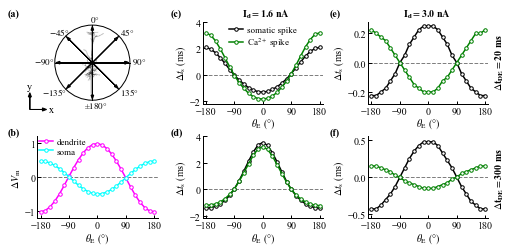

In [8]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
fig, ax = plt.subplots(2, 3, figsize=(7, 3.5))
ax0, ax1, ax2, ax3, ax4, ax5 = ax[0, 0], ax[0,1], ax[0,2], ax[1,0], ax[1,1], ax[1,2]
##############################################################################
lw, color = 1, color_EF
circle = plt.Circle((0, 0), 11, fill=False, color=color, lw=lw)
ax0.add_patch(circle)

list_theta = np.arange(0, 2*np.pi+0.01, np.pi/4)
for theta in list_theta:
    ax0.arrow(0, 0, 9.5*np.cos(theta), 9.5*np.sin(theta), width=0.02, color=color_EF, head_width=0.8)
ax0.plot([-11, 11], [0, 0], lw=lw, color=color)
ax0.plot([0, 0], [-11, 11], lw=lw, color=color)
ax0.plot([-11*np.cos(np.pi/4), 11*np.cos(np.pi/4)], [-11*np.cos(np.pi/4), 11*np.cos(np.pi/4)], lw=lw, color=color)
ax0.plot([-11*np.cos(np.pi/4), 11*np.cos(np.pi/4)], [11*np.cos(np.pi/4), -11*np.cos(np.pi/4)], lw=lw, color=color)
ax0.set_xlim(-12, 15)
ax0.set_ylim(-12, 12)
ax0.set_aspect('equal')
ax0.axis('off')
ax0.text(11.5, -0.5, r'$90\degree$', fontsize=9)
ax0.text(-16.3-0.8, -0.5, r'$-90\degree$', fontsize=9)
ax0.text(-0.7, 11.8, r'$0\degree$', fontsize=9)
ax0.text(-2-0.5, -13.4, r'±$180\degree$', fontsize=9)
ax0.text(8, 8, r'$45\degree$', fontsize=9)
ax0.text(-12-0.8, 8, r'$-45\degree$', fontsize=9)
ax0.text(8, -9.5, r'$135\degree$', fontsize=9)
ax0.text(-14-0.8, -9.5, r'$-135\degree$', fontsize=9)
##############################################################################
listEfieldDirection = np.arange(-180, 180+1, 15)
data = np.load('data/Imax1.6-3nA_tde0-10-20-250-300ms_Vds0-2.5-5mV_EFDirection-180-180degree.npy')
data = data.squeeze().transpose(0, 2, 1, 4, 3)  # (Imax, tde, vds, results, direction)
i = 1 # 1 for 2.5V/m, 2 for 5V/m
data_16nA_20ms  = data[0][2][i] - data[0][2][0]
data_16nA_300ms = data[0][4][i] - data[0][4][0]
data_30nA_20ms  = data[1][2][i] - data[1][2][0]
data_30nA_300ms = data[1][4][i] - data[1][4][0]
ax1.plot(listEfieldDirection, data_16nA_20ms[8], color='k', marker='o', ms=3.5, mfc='w', label='somatic spike')
ax1.plot(listEfieldDirection, data_16nA_20ms[3], color='g', marker='o', ms=3.5, mfc='w', label=r'Ca$^{2+}$ spike')
ax1.legend(fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.5, handlelength=1.5, borderaxespad=0)
##############################################################################
ax2.plot(listEfieldDirection, data_30nA_20ms[8], color='k', marker='o', ms=3.5, mfc='w')
ax2.plot(listEfieldDirection, data_30nA_20ms[3], color='g', marker='o', ms=3.5, mfc='w')
##############################################################################
ax4.plot(listEfieldDirection, data_16nA_300ms[8], color='k', marker='o', ms=3.5, mfc='w')
ax4.plot(listEfieldDirection, data_16nA_300ms[3], color='g', marker='o', ms=3.5, mfc='w')
##############################################################################
ax5.plot(listEfieldDirection, data_30nA_300ms[8], color='k', marker='o', ms=3.5, mfc='w')
ax5.plot(listEfieldDirection, data_30nA_300ms[3], color='g', marker='o', ms=3.5, mfc='w')
##############################################################################
data = np.load('data/polarizaiton_E2.5mV_soma_and_dend.npz')
polarization_soma, polarization_dend = data['polarization_soma'], data['polarization_dend']
ax3.plot(listEfieldDirection, polarization_dend, color=color_nexus, marker='o', ms=3.5, mfc='w', label='dendrite')
ax3.plot(listEfieldDirection, polarization_soma, color=color_soma, marker='o', ms=3.5, mfc='w', label='soma')
ax3.legend(loc='upper left', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.2, handlelength=1.5, borderaxespad=0)
ax3.set_ylabel(r'$\Delta V_{\mathrm{m}}$', fontsize=10, labelpad=2)
ax3.set_ylim(-1.2, 1.2)
##############################################################################
for item in [ax1, ax2, ax4, ax5]:
    item.axhline(0, lw=1., ls='--', color='grey', zorder=-1)
    item.set_ylabel(r'$\Delta t_{\mathrm{s}}$ (ms)', fontsize=10, labelpad=2)
ax3.axhline(0, color='grey', lw=1, ls='--', zorder=-5)
for item in [ax1, ax2, ax3, ax4, ax5]:
    item.set_xlim(-190, 190)
    item.set_xticks(np.arange(-180, 185, 90))
    item.set_xlabel(r'$\theta_{\mathrm{E}}$ (°)', fontsize=10, labelpad=1)
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=2)
ax1.set_ylim(-2.2, 4)
ax2.set_ylim(-0.28, 0.28)
ax4.set_ylim(-2.2, 4)
ax5.set_ylim(-0.55, 0.55)
ax5.set_yticks([-0.5, 0, 0.5])

# ax0.text(-15.5, -0.5, r'$90\degree$', fontsize=9)
# ax0.text(11.5, -0.5, r'$-90\degree$', fontsize=9)

# ax0.text(-0.7, -13.4, r'$0\degree$', fontsize=9)
# ax0.text(-2.8, 12, r'±$180\degree$', fontsize=9)
# ax0.text(8, 8, r'$-45\degree$', fontsize=9)
# ax0.text(-11.5, 8, r'$45\degree$', fontsize=9)
# ax0.text(8, -9.5, r'$-135\degree$', fontsize=9)
# ax0.text(-13.5, -9.5, r'$135\degree$', fontsize=9)

plt.tight_layout(w_pad=0.5, h_pad=0.2)
ax01 = fig.add_axes([0.132, 0.64, 0.1, 0.25])
photo =Image.open('data/schaefer2003Model.png')
ax01.imshow(photo, origin='upper')
ax01.set_xlim(ax01.get_xlim()[0]-0, ax01.get_xlim()[1]+0)
ax01.set_ylim(ax01.get_ylim()[0]+0, ax01.get_ylim()[1]-0)
ax01.axis('off')
ax0.set_zorder(1)
ax01.set_zorder(-1)

ax02 = fig.add_axes([0.05, 0.57, 0.05, 0.08])
ax02.arrow(0, 0, 6, 0, width=0.02, color='k', head_width=1.5, head_length=2)
ax02.arrow(0, 0, 0, 6, width=0.02, color='k', head_width=1.5, head_length=2)
ax02.set_aspect('equal')
ax02.axis('off')
ax02.text(9, -1, 'x', fontsize=10)
ax02.text(-1.2, 10, 'y', fontsize=10)


fig.text(0.015, 0.95, '(a)', fontsize=10, fontweight='bold')
fig.text(0.34, 0.95, '(c)', fontsize=10, fontweight='bold')
fig.text(0.655, 0.95, '(e)', fontsize=10, fontweight='bold')
fig.text(0.015, 0.48, '(b)', fontsize=10, fontweight='bold')
fig.text(0.34, 0.48, '(d)', fontsize=10, fontweight='bold')
fig.text(0.655, 0.48, '(f)', fontsize=10, fontweight='bold')

fig.text(0.48, 0.95, r'$\mathbf{I}_{\mathbf{d}}=$1.6 nA', fontsize=10, fontweight='bold')
fig.text(0.8, 0.95, r'$\mathbf{I}_{\mathbf{d}}=$3.0 nA', fontsize=10, fontweight='bold')
fig.text(0.98, 0.67, r'$\Delta\mathbf{t}_{\mathbf{DE}}=$20 ms', fontsize=10, fontweight='bold', rotation='vertical')
fig.text(0.98, 0.2, r'$\Delta\mathbf{t}_{\mathbf{DE}}=$300 ms', fontsize=10, fontweight='bold', rotation='vertical')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure6.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure6.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 7

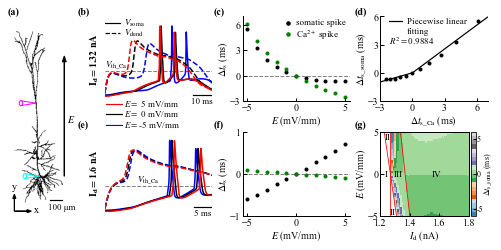

In [9]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
fig = plt.figure(figsize=(7, 3.5))
shape0, shape1 = 2, 11
ax0 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,0), rowspan=2, colspan=2)
ax1 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,2), rowspan=1, colspan=3)
ax2 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,5), rowspan=1, colspan=3)
ax3 = plt.subplot2grid(shape=(shape0, shape1), loc=(0,8), rowspan=1, colspan=3)
ax4 = plt.subplot2grid(shape=(shape0, shape1), loc=(1,2), rowspan=1, colspan=3)
ax5 = plt.subplot2grid(shape=(shape0, shape1), loc=(1,5), rowspan=1, colspan=3)
ax6 = plt.subplot2grid(shape=(shape0, shape1), loc=(1,8), rowspan=1, colspan=3)
###################################################################################
photo =Image.open('data/AmirDudai2022Model.png')
ax0.imshow(photo, origin='upper')
ax0.set_xlim(ax0.get_xlim()[0]-0, ax0.get_xlim()[1]+25)
ax0.set_ylim(ax0.get_ylim()[0]+0, ax0.get_ylim()[1]-0)
ax0.axis('off')
###################################################################################
data = np.load('data/vsvd_E5mVmm_tde20ms_Imax1.32nA_HayModel.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
idx600 = np.nonzero(t>=600)[0][0]
colors = ['b', 'k', 'r']
for i in range(3):
    ax1.plot(t[:idx600], vsoma[i][:idx600], color=colors[i])
    ax1.plot(t[:idx600], vdend[i][:idx600], color=colors[i], ls='--')
ax1.set_xlim(530, 585)
ax1.set_ylim(-90, 50)
ax1.axis('off')
###################################################################################
data = np.load('data/vsvd_E5mVmm_tde20ms_Imax1.6nA_HayModel.npz')
t, vsoma, vdend, Iepsp = data['t'], data['vsoma'], data['vdend'], data['Iepsp']
for i in range(3):
    ax4.plot(t[:idx600], vsoma[i][:idx600], color=colors[i])
    ax4.plot(t[:idx600], vdend[i][:idx600], color=colors[i], ls='--')
ax4.set_xlim(530, 560)
ax4.set_ylim(-90, 50)
ax4.axis('off')
###################################################################################
data = np.load('Model_AmirDudai(2022)/data/Hay_Imax1.32nA_tde20ms_varyVds-15-15mV.npy')
data = data.transpose()
idx1, idx2 = 10, 21
listVds, CaStartTime, firstSpikeTime = data[1][idx1:idx2], data[4][idx1:idx2], data[10][idx1:idx2]
firstSpikeTime[firstSpikeTime==0] = None
CaStartTime[CaStartTime==0] = None
dtFirstSpike = firstSpikeTime - firstSpikeTime[5]
dtCaStartTime = CaStartTime - CaStartTime[5]
ax2.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax2.scatter(listVds, dtFirstSpike, s=9, color='k', zorder=1)
ax2.scatter(listVds, dtCaStartTime, s=9, color='g', zorder=1)
###################################################################################
# x = dtCaStartTime[:, np.newaxis]
# y = dtFirstSpike[:, np.newaxis]
# xfit = np.linspace(-3, 7, x.shape[0])[:, np.newaxis]
# model = LinearRegression()
# model.fit(x, y)
# yfit = model.predict(xfit)
# r2Score = r2_score(y, model.predict(x))
x, y = dtCaStartTime, dtFirstSpike
x, y = Sort_by_col1([x, y])
init_values      = [1, 1]
best_vals_control, covar = curve_fit(thresholdLinearFunction, x, y, p0=init_values, maxfev = 100000000)
xfit = np.linspace(-3, 7, x.shape[0])
yfit = thresholdLinearFunction(xfit, *best_vals_control)
r2Score = r2_score(y, thresholdLinearFunction(x, *best_vals_control))

ax3.scatter(dtCaStartTime, dtFirstSpike, s=9, color='k', zorder=1)
ax3.plot(xfit, yfit, lw=1.2, color='k')

ax3.plot([-2-0.2, -1], [5.5]*2, lw=1.2, color='k')
ax3.text(-0.5, 4.2, 'Piecewise linear\nfitting', fontsize=9)
ax3.text(-2-0.2, 3, r'$R^2=$%.4f' % r2Score, fontsize=9)
###################################################################################
data = np.load('Model_AmirDudai(2022)/data/Hay_Imax1.6nA_tde20ms_varyVds-15-15mV.npy')
data = data.transpose()
listVds, CaStartTime, firstSpikeTime = data[1][idx1:idx2], data[4][idx1:idx2], data[10][idx1:idx2]
firstSpikeTime[firstSpikeTime==0] = None
CaStartTime[CaStartTime==0] = None
dtFirstSpike = firstSpikeTime - firstSpikeTime[5]
dtCaStartTime = CaStartTime - CaStartTime[5]
ax5.axhline(0, color='grey', ls='--', lw=1, zorder=-1)
ax5.scatter(listVds, dtFirstSpike, s=9, color='k', zorder=1)
ax5.scatter(listVds, dtCaStartTime, s=9, color='g', zorder=1)
###################################################################################
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaSpikeBool, CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, CaPeakTime, \ 3, 4, 5, 6, 7, 8
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 9, 10, 11, 12
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude, ICaPeakTime 13, 14, 15, 16, 17
data = np.load('Model_AmirDudai(2022)/data/Hay_Imax1-2nA_tde20ms_Vds-5-5mV.npy')
data = data.squeeze().transpose(2, 1, 0) # (res, Vds, Imax)
firstSpikeTime, spikeNumber = data[10], data[9]
dtFirstSpikeTime  = np.zeros_like(firstSpikeTime)
listImax = data[0][0]
listVds = data[1].transpose()[0]
for i in range(len(listVds)):
    dtFirstSpikeTime[i, :] = firstSpikeTime[i, :] - firstSpikeTime[25, :]
index = np.logical_or(np.abs(dtFirstSpikeTime) > 100, spikeNumber==0)
dtFirstSpikeTime[index] = None

pcm = ax6.pcolormesh(listImax, listVds, dtFirstSpikeTime, cmap='tab20c', vmin=-6, vmax=6)
cbar = plt.colorbar(pcm, ax=ax6, label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', pad=0.025, fraction=0.15, aspect=18, location='right')
cbar.set_ticks(np.arange(-5, 6, 5))
cbar.set_ticklabels(['-5', '0', '5'])
cbar.set_label(label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=8, labelpad=-1.5)
cbar.ax.tick_params(labelsize=8, pad=0.5)
ax6.set_xlim(1.2, 1.8)
ax6.set_ylim(-5, 5)
ax6.set_xticks([1.2, 1.4, 1.6, 1.8])
ax6.set_yticks([-5, 0, 5])

lw=0.8
ax6.plot([1.4, 1.336], [-5, 5], color='r', lw=lw)
ax6.plot([1.31, 1.226], [-5, 5], color='r', lw=lw)
ax6.plot([1.268, 1.268], [-5, 5], color='r', lw=lw)
ax6.text(1.23, -0.4, 'I', fontsize=9)
ax6.text(1.231, 4, 'II', fontsize=9)
ax6.text(1.266, -4.8, 'II', fontsize=9)
ax6.text(1.29, -0.4, 'III', fontsize=9)
ax6.text(1.55, -0.4, 'IV', fontsize=9)
ax6.tick_params(pad=2)
ax6.spines['bottom'].set_linewidth(linewidth)
ax6.spines['left'].set_linewidth(linewidth)
ax6.spines['top'].set_linewidth(linewidth)
ax6.spines['right'].set_linewidth(linewidth)
ax6.set_xlabel(r'$\mathit{I}_{\mathrm{d}}$ (nA)', fontsize=10, labelpad=1)
ax6.set_ylabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=0)
###################################################################################
ax2.set_ylim(-3, 7)
ax2.set_yticks([-3, 0, 3, 6])
ax2.set_ylabel(r'$\Delta t_{\mathrm{s}}$ (ms)', fontsize=10, labelpad=0)
ax5.set_ylim(-1, 1)
ax5.set_yticks([-1, 0, 1])
ax5.set_ylabel(r'$\Delta t_{\mathrm{s}}$ (ms)', fontsize=10, labelpad=0)
ax3.set_xlim(-3, 7)
ax3.set_xticks([-3, 0, 3, 6])
ax3.set_ylim(-2, 6)
ax3.set_yticks([-3, 0, 3, 6])

dx = 1
ax2.scatter(0.2-dx, 6.25, s=12, color='k', marker='o')
ax2.text(1-dx, 6, 'somatic spike', fontsize=9)
ax2.scatter(0.2-dx, 4.9, s=12, color='g', marker='o')
ax2.text(1-dx, 4.5, r'Ca$^{2+}$ spike', fontsize=9)

ax1.text(540, -100, r'$\mathit{E}=$ 5 mV/mm', fontsize=9)
ax1.text(540, -100-17, r'$\mathit{E}=$ 0 mV/mm', fontsize=9)
ax1.text(540, -100-34, r'$\mathit{E}=$-5 mV/mm', fontsize=9)
ax1.plot([530, 538], [40-1]*2, color='k', lw=1.2)
ax1.text(540, 35-1, r'$V_{\mathrm{soma}}$', fontsize=9)
ax1.plot([530, 538], [23]*2, color='k', ls='--', lw=1.2)
ax1.text(540, 18, r'$V_{\mathrm{dend}}$', fontsize=9)
ax1.plot([575, 585], [-80]*2, color='k', lw=1.2)
ax1.text(574, -95, r'10 ms', fontsize=9)

ax4.plot([555, 560], [-75]*2, color='k', lw=1.2)
ax4.text(555, -90, r'5 ms', fontsize=9)

ax0.arrow(105, 300, 0, -235, width=0.9, color=color_EF, head_width=8)
ax0.text(110, 190, r'$\mathit{E}$', fontsize=10, color=color_EF, fontweight='bold')
centerx, centery = 16, 150
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_nexus, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([16, 46], [150-5, 150], lw=1, color=color_nexus)
ax0.plot([16, 46], [150+5, 150], lw=1, color=color_nexus)
centerx, centery = 24, 300
circlePatch = mpatches.Ellipse((centerx, centery), 7, 10, ec=color_soma, lw=1, fill=False)
ax0.add_artist(circlePatch)
ax0.plot([24, 54], [300-5, 300], lw=1, color=color_soma)
ax0.plot([24, 54], [300+5, 300], lw=1, color=color_soma)
ax0.plot([75, 100], [350]*2, color='k', lw=1.2)
ax0.text(71, 370, '100 μm', fontsize=9)
for item in [ax2, ax5]:
    item.set_xlim(-5.5, 5.5)
    item.set_xlabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=1)
for item in [ax3]:
    item.set_ylabel(r'$\Delta t_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=0)
    item.set_xlabel(r'$\Delta t_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=1)
for item in [ax2, ax3, ax5]:
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=2)


ax1.plot([530, 600], [-40]*2, color='grey', ls='--', lw=1, zorder=-1)
ax4.plot([530, 560], [-40]*2, color='grey', ls='--', lw=1, zorder=-1)
ax1.text(530, -34, r'$V_{\mathrm{th\_Ca}}$', fontsize=9)
ax4.text(539, -34, r'$V_{\mathrm{th\_Ca}}$', fontsize=9)

plt.tight_layout(w_pad=0.3, h_pad=0)
ax11 = fig.add_axes([0.205, 0.507, 0.035, 0.09])
ax11.plot([0, 1], [2]*2, color='r', lw=1.2)
ax11.plot([0, 1], [1]*2, color='k', lw=1.2)
ax11.plot([0, 1], [0]*2, color='b', lw=1.2)
ax11.axis('off')

ax01 = fig.add_axes([0.02, 0.15, 0.04, 0.1])
ax01.arrow(0, 0, 6, 0, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.arrow(0, 0, 0, 6, width=0.02, color='k', head_width=1.5, head_length=2)
ax01.set_xlim(-1, 8.5)
ax01.set_ylim(-1, 8.5)
ax01.set_aspect('equal')
ax01.axis('off')
ax01.text(9, -1, 'x', fontsize=10)
ax01.text(-1.2, 10, 'y', fontsize=10)

fig.text(0.01, 0.95, '(a)', fontsize=10, fontweight='bold')
fig.text(0.15, 0.95, '(b)', fontsize=10, fontweight='bold')
fig.text(0.42, 0.95, '(c)', fontsize=10, fontweight='bold')
fig.text(0.7, 0.95, '(d)', fontsize=10, fontweight='bold')
fig.text(0.15, 0.5, '(e)', fontsize=10, fontweight='bold')
fig.text(0.42, 0.5, '(f)', fontsize=10, fontweight='bold')
fig.text(0.7, 0.5, '(g)', fontsize=10, fontweight='bold')
fig.text(0.17, 0.68, r'$\mathbf{I}_{\mathbf{d}}=$1.32 nA', fontsize=10, fontweight='bold', rotation='vertical')
fig.text(0.17, 0.24, r'$\mathbf{I}_{\mathbf{d}}=$1.6 nA', fontsize=10, fontweight='bold', rotation='vertical')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure7.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure7.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure 8

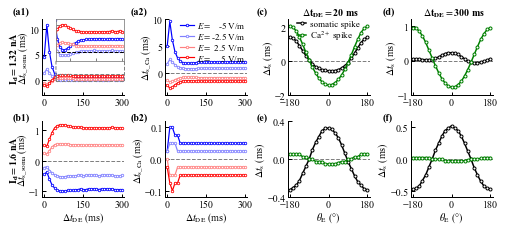

In [10]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
fig, ax = plt.subplots(2, 4, figsize=(7, 3.2))
ax0, ax2, ax4, ax6 = ax[0,0], ax[0,1], ax[0,2], ax[0,3]
ax1, ax3, ax5, ax7 = ax[1,0], ax[1,1], ax[1,2], ax[1,3]
##############################################################################
list_tde = np.arange(0, 300+1, 10)
data = np.load('Model_AmirDudai(2022)/data/Imax1.32_1.6nA_tde0-300ms_Vds+-5+-2.5mV_EFDirection90degree.npy')
data = data.squeeze().transpose(0, 1, 3, 2) # (Imax, Vds, results, tDE)
data16, data30 = data[0], data[1]
for i in [0, 1, 3, 4]:
    data16[i] = data16[i] - data16[2]
    data30[i] = data30[i] - data30[2]

colorLength = 5
list_color0 = plt.get_cmap('bwr', lut=colorLength)  # bwr, seismic, cool
colors = [list_color0(i) for i in range(colorLength)]
list_strE = ['-5', '-2.5', 'snowp', '2.5', '5']
labels = [r'$E=$   -5 V/m', r'$E=$-2.5 V/m', 'snowp', r'$E=$ 2.5 V/m', r'$E=$    5 V/m']
for i in [0, 1, 3, 4]:
    tempindex = data16[i][10] > -100
    ax0.plot(list_tde[tempindex], data16[i][10][tempindex], color=colors[i],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=labels[i])
# ax0.legend(loc='upper right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.2, handlelength=1.5, borderaxespad=0)
##################################################
ax0ins = ax0.inset_axes([0.175, 0.45, 1-0.175, 0.55], xticklabels=[], yticklabels=[], xlim=(45, 305), ylim=(-0.3, 1.2))
ax0ins.axhline(0, color='k', lw=1, ls='--', zorder=1)
for i in [0, 1, 3, 4]:
    tempindex = data16[i][10] > -100
    ax0ins.plot(list_tde[tempindex], data16[i][10][tempindex], color=colors[i],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=labels[i], zorder=0)
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
color='grey'
mark_inset(ax0, ax0ins, loc1=3, loc2=4, ec=color, lw=1, ls='--', zorder=5)
# ax0.indicate_inset_zoom(ax0ins, edgecolor='g', alpha=1, lw=1, ls='--')
ax0ins.spines['bottom'].set_edgecolor(color)
ax0ins.spines['top'].set_edgecolor(color)
ax0ins.spines['left'].set_edgecolor(color)
ax0ins.spines['right'].set_edgecolor(color)
ax0ins.tick_params(axis='both', length=3, color=color)
##############################################################################
for i in [0, 1, 3, 4]:
    tempindex = data16[i][4] > -100
    ax2.plot(list_tde[tempindex], data16[i][4][tempindex], color=colors[i],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=labels[i])
ax2.legend(loc='upper right', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.1, handlelength=1.5, borderaxespad=0)
##############################################################################
for i in [0, 1, 3, 4]:
    tempindex = data30[i][10] > -100
    ax1.plot(list_tde[tempindex], data30[i][10][tempindex], color=colors[i],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=r'$\mathit{E}=$%sV/m' % list_strE[i])
##############################################################################
for i in [0, 1, 3, 4]:
    tempindex = data30[i][4] > -100
    ax3.plot(list_tde[tempindex], data30[i][4][tempindex], color=colors[i],
             marker='o', mfc='w', ms=2.5, mew=0.8, lw=1.2, label=r'$\mathit{E}=$%sV/m' % list_strE[i])
##############################################################################
listEfieldDirection = np.arange(-180, 180+1, 15)
data = np.load('Model_AmirDudai(2022)/data/Imax1.32_1.6nA_tde0-20-300ms_Vd0-2.5-5smV_EFDirection-180-180degree.npy')
data = data.squeeze().transpose(0, 2, 1, 4, 3)  # (Imax, tde, vds, results, direction)
i = 1 # 1 for 2.5V/m, 2 for 5V/m
data_16nA_20ms  = data[0][1][i] - data[0][1][0]
data_16nA_300ms = data[0][2][i] - data[0][2][0]
data_30nA_20ms  = data[1][1][i] - data[1][1][0]
data_30nA_300ms = data[1][2][i] - data[1][2][0]
ax4.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_16nA_20ms[10]), color='k', marker='o', ms=3, mfc='w', label='somatic spike')
ax4.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_16nA_20ms[4]), color='g', marker='o', ms=3, mfc='w', label=r'Ca$^{2+}$ spike')
ax4.legend(loc='upper center', fontsize=9, frameon=False, labelspacing=0.1, handletextpad=0.4, borderpad=0.1, handlelength=1., borderaxespad=0)
##############################################################################
ax5.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_30nA_20ms[10]), color='k', marker='o', ms=3, mfc='w', label='Soma spike')
ax5.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_30nA_20ms[4]), color='g', marker='o', ms=3, mfc='w', label=r'Ca$^{2+}$ spike')
##############################################################################
ax6.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_16nA_300ms[10]), color='k', marker='o', ms=3, mfc='w', label='Soma spike')
ax6.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_16nA_300ms[4]), color='g', marker='o', ms=3, mfc='w', label=r'Ca$^{2+}$ spike')
##############################################################################
ax7.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_30nA_300ms[10]), color='k', marker='o', ms=3, mfc='w', label='Soma spike')
ax7.plot(listEfieldDirection, np.interp(listEfieldDirection, np.arange(-180, 180+1, 10), data_30nA_300ms[4]), color='g', marker='o', ms=3, mfc='w', label=r'Ca$^{2+}$ spike')
##############################################################################
ax0.set_ylim(-3, 12)
ax2.set_ylim(-4, 10)
ax1.set_ylim(-1.2, 1.3)
ax3.set_ylim(-0.12, 0.12)
for item in [ax0, ax1, ax2, ax3]:
    item.set_xlim(-10, 305)
    item.set_xticks([0, 150, 300])
for item in [ax1, ax3]:
    item.set_xlabel(r'$\Delta\mathit{t}_{\mathrm{DE}}$ (ms)', fontsize=10, labelpad=1)
ax0.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=0)
ax1.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=10, labelpad=0)
ax2.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=0)
ax3.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s\_Ca}}$ (ms)', fontsize=10, labelpad=0)
##############################################################################
ax4.set_ylim(-2, 2.5)
ax5.set_ylim(-0.4, 0.4)
ax5.set_yticks([-0.4, 0, 0.4])
ax6.set_ylim(-1, 1.2)
ax7.set_ylim(-0.6, 0.6)
for item in [ax4, ax5, ax6, ax7]:
    item.set_xlim(-190, 190)
    item.set_xticks([-180, 0, 180])
for item in [ax5, ax7]:
    item.set_xlabel(r'$\theta_{\mathrm{E}}$ (°)', fontsize=10, labelpad=1)
for item in [ax4, ax5, ax6, ax7]:
    item.set_ylabel(r'$\Delta\mathit{t}_{\mathrm{s}}$ (ms)', fontsize=10, labelpad=0)
##############################################################################

for item in [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    item.axhline(0, color='grey', lw=1, ls='--', zorder=-5)
    item.spines['top'].set_color('none')
    item.spines['right'].set_color('none')
    item.spines['bottom'].set_linewidth(linewidth)
    item.spines['left'].set_linewidth(linewidth)
    item.tick_params(pad=2)

plt.tight_layout(w_pad=0.1, h_pad=1)
fig.text(0.015, 0.96, '(a1)', fontsize=10, fontweight='bold')
fig.text(0.25, 0.96, '(a2)', fontsize=10, fontweight='bold')
fig.text(0.5, 0.96, '(c)', fontsize=10, fontweight='bold')
fig.text(0.75, 0.96, '(d)', fontsize=10, fontweight='bold')
fig.text(0.015, 0.5, '(b1)', fontsize=10, fontweight='bold')
fig.text(0.25, 0.5, '(b2)', fontsize=10, fontweight='bold')
fig.text(0.5, 0.5, '(e)', fontsize=10, fontweight='bold')
fig.text(0.75, 0.5, '(f)', fontsize=10, fontweight='bold')

fig.text(0.005, 0.67, r'$\mathbf{I}_{\mathbf{d}}=$1.32 nA', fontsize=10, fontweight='bold', rotation='vertical')
fig.text(0.005, 0.24, r'$\mathbf{I}_{\mathbf{d}}=$1.6 nA', fontsize=10, fontweight='bold', rotation='vertical')
fig.text(0.59, 0.95, r'$\Delta\mathbf{t}_{\mathbf{DE}}=$20 ms', fontsize=10, fontweight='bold')
fig.text(0.83, 0.95, r'$\Delta\mathbf{t}_{\mathbf{DE}}=$300 ms', fontsize=10, fontweight='bold')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure8.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figure8.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure Revision 1

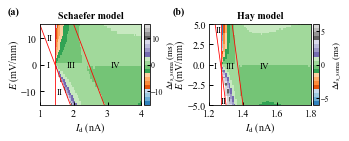

In [11]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax0, ax1 = ax
##############################################################################
data = np.load('data/Imax1-4nA_tde20ms_varyVds-15-15mV.npy')
data = data.squeeze().transpose(2, 0, 1)
# '''
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, \ 3, 4, 5, 6
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 7, 8, 9, 10
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude 11, 12, 13, 14
# '''
listVds = data[1][0]
listImax = data[0].transpose()[0]
spikeNumber = data[7].transpose()
firstSpikeTime = data[8].transpose()
dtFirstSpikeTime  = np.zeros_like(firstSpikeTime)
for i in range(31):
    dtFirstSpikeTime[i, :] = firstSpikeTime[i, :] - firstSpikeTime[15, :]
index = np.logical_or(np.abs(dtFirstSpikeTime) > 100, spikeNumber==0)
dtFirstSpikeTime[index] = None
pcm = ax0.pcolormesh(listImax, listVds, dtFirstSpikeTime, cmap='tab20c', vmin=-15, vmax=15)
cbar = plt.colorbar(pcm, ax=ax0, label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', pad=0.02, fraction=0.2, aspect=13)
cbar.set_ticks(np.arange(-10, 11, 10))
cbar.set_label(label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=9, labelpad=1)
cbar.ax.tick_params(labelsize=8, pad=1)
ax0.set_xlim(1, 4)
ax0.set_ylim(-15, 15)
ax0.set_xlabel(r'$\mathit{I}_{\mathrm{d}}$ (nA)', fontsize=10, labelpad=3)
ax0.set_ylabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=0)

lw=0.8
ax0.plot([2.9, 2], [-15, 15], color='r', lw=lw)
ax0.plot([1.9, 1], [-15, 15], color='r', lw=lw)
ax0.plot([1.46, 1.46], [-15, 15], color='r', lw=lw)
ax0.text(1.2, -1, 'I', fontsize=9)
ax0.text(1.2, 9, 'II', fontsize=9)
ax0.text(1.5, -11, 'II', fontsize=9)
ax0.text(1.8, -1, 'III', fontsize=9)
ax0.text(3.1, -1, 'IV', fontsize=9)
##############################################################################
# paraImax, paraVds, paraTde, \ 0, 1, 2
# CaSpikeBool, CaStartTime, CaEndTime, CaDuration, CaPeakAmplitude, CaPeakTime, \ 3, 4, 5, 6, 7, 8
# spikeNumber, firstSpikeTime, secondSpikeTime, firingRateWithinBurst, \ 9, 10, 11, 12
# ICaStartTime, ICaEndTime, ICaDuration, ICaPeakAmplitude, ICaPeakTime 13, 14, 15, 16, 17
data = np.load('Model_AmirDudai(2022)/data/Hay_Imax1-2nA_tde20ms_Vds-5-5mV.npy')
data = data.squeeze().transpose(2, 1, 0) # (res, Vds, Imax)
firstSpikeTime, spikeNumber = data[10], data[9]
dtFirstSpikeTime  = np.zeros_like(firstSpikeTime)
listImax = data[0][0]
listVds = data[1].transpose()[0]
for i in range(len(listVds)):
    dtFirstSpikeTime[i, :] = firstSpikeTime[i, :] - firstSpikeTime[25, :]
index = np.logical_or(np.abs(dtFirstSpikeTime) > 100, spikeNumber==0)
dtFirstSpikeTime[index] = None

pcm = ax1.pcolormesh(listImax, listVds, dtFirstSpikeTime, cmap='tab20c', vmin=-6, vmax=6)
cbar = plt.colorbar(pcm, ax=ax1, label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', pad=0.02, fraction=0.2, aspect=13)
cbar.set_ticks(np.arange(-5, 6, 5))
cbar.set_label(label=r'$\Delta\mathit{t}_{\mathrm{s\_soma}}$ (ms)', fontsize=9, labelpad=1)
cbar.ax.tick_params(labelsize=8, pad=1)
ax1.set_xlim(1.2, 1.8)
ax1.set_ylim(-5, 5)
ax1.set_xticks([1.2, 1.4, 1.6, 1.8])

lw=0.8
ax1.plot([1.4, 1.336], [-5, 5], color='r', lw=lw)
ax1.plot([1.3, 1.236], [-5, 5], color='r', lw=lw)
ax1.plot([1.268, 1.268], [-5, 5], color='r', lw=lw)
ax1.text(1.23, -0.4, 'I', fontsize=9)
ax1.text(1.24, 4, 'II', fontsize=9)
ax1.text(1.268, -4.8, 'II', fontsize=9)
ax1.text(1.3, -0.4, 'III', fontsize=9)
ax1.text(1.5, -0.4, 'IV', fontsize=9)
###############################################################################
for item in [ax0, ax1]:
    item.set_xlabel(r'$\mathit{I}_{\mathrm{d}}$ (nA)', fontsize=10, labelpad=2)
    item.set_ylabel(r'$\mathit{E}$ (mV/mm)', fontsize=10, labelpad=0)
ax0.set_title('Schaefer model', fontsize=10, weight='bold')
ax1.set_title('Hay model', fontsize=10, weight='bold')
plt.tight_layout(w_pad=0.1, h_pad=0)

fig.text(0.03, 0.91, '(a)', fontsize=10, fontweight='bold')
fig.text(0.49, 0.91, '(b)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figureR1.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figureR1.png',format='png',transparent=True,dpi=600,bbox_inches='tight')

# Figure Revision 2

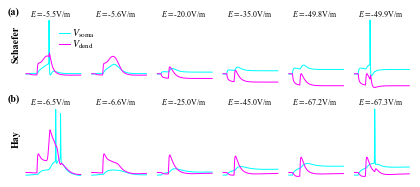

In [12]:
plt.rcParams.update({
    'font.size': 10,  
    'font.family': 'times new roman',
    'mathtext.fontset': 'stix',
    'mathtext.rm': 'Times New Roman',
    'mathtext.it': 'Times New Roman:italic'
})
linewidth = 1
plt.rcParams['xtick.direction'] = 'in'   
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = linewidth
plt.rcParams['ytick.major.width'] = linewidth
################################################### Schaefer model
fig, ax = plt.subplots(2, 1, figsize=(7, 3))
ax0, ax1 = ax
list_Vds = [-5.5, -5.6, -20.0, -35.0, -49.8, -49.9]
for i, Vds in enumerate(list_Vds):
    data = np.load('data/Schaefer_somaSpike_byStrongNegativeEF_Imax1.6nA_Tde20ms_Vds-%.1fmV_Etheta90.npy' % np.abs(Vds), allow_pickle=True).item()
    t, vsoma, vdend = data['t'], data['vsoma'], data['vdend']
    ax0.plot(t + i*180, vsoma, color=color_soma, lw=1)
    ax0.plot(t + i*180, vdend, color=color_nexus, lw=1)
    ax0.text(510 + i*180, 30, '$E=$%.1fV/m' % Vds, fontdict={'fontsize':8})
ax0.set_xlim(490, 1560)
ax0.text(460, -50, 'Schaefer', rotation='vertical', fontdict={'fontsize':10, 'fontweight': 'bold'})
ax0.axis('off')
################################################### Hay model
list_Vds = [-6.5, -6.6, -25.0, -45.0, -67.2, -67.3]
for i, Vds in enumerate(list_Vds):
    data = np.load('data/Hay_somaSpike_byStrongNegativeEF_Imax1.32nA_Tde20ms_Vds-%.1fmV_Etheta90.npy' % np.abs(Vds), allow_pickle=True).item()
    t, vsoma, vdend = data['t'], data['vsoma'], data['vdend']
    ax1.plot(t + i*180, vsoma, color=color_soma, lw=1)
    ax1.plot(t + i*180, vdend, color=color_nexus, lw=1)
    ax1.text(510 + i*180, 40, '$E=$%.1fV/m' % Vds, fontdict={'fontsize':8})
ax1.set_xlim(490, 1560)
ax1.text(460, -30, 'Hay', rotation='vertical', fontdict={'fontsize':10, 'fontweight': 'bold'})
ax1.axis('off')
###################################################
ax0.plot([590, 620], [0, 0], color=color_soma, lw=1)
ax0.plot([590, 620], [-20, -20], color=color_nexus, lw=1)
ax0.text(625, -5, '$V_{\mathrm{soma}}$', fontsize=10)
ax0.text(625, -25, '$V_{\mathrm{dend}}$', fontsize=10)
# plt.tight_layout(w_pad=0, h_pad=1)
fig.text(0.095, 0.892, '(a)', fontsize=10, fontweight='bold')
fig.text(0.095, 0.485, '(b)', fontsize=10, fontweight='bold')

plt.savefig(r'C:\Users\Snowp\Desktop\figures\figureR2.png',format='png',transparent=True,dpi=600,bbox_inches='tight')
plt.savefig(r'C:\Users\Snowp\Desktop\figures\figureR2.tif',format='tif',transparent=True,dpi=400,bbox_inches='tight')